# Processing Data using Resipy

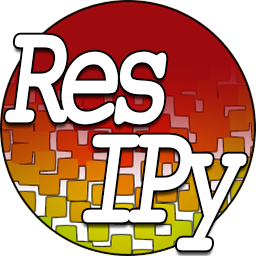

# Import and setup

In [1]:
!pip install resipy

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
   ---------------------------------------- 0.0/87.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/87.9 MB 330.3 kB/s eta 0:04:27
   ---------------------------------------- 0.1/87.9 MB 1.7 MB/s eta 0:00:52
   ---------------------------------------- 1.1/87.9 MB 8.7 MB/s eta 0:00:10
   - -------------------------------------- 2.9/87.9 MB 17.1 MB/s eta 0:00:05
   - -------------------------------------- 4.2/87.9 MB 19.1 MB/s eta 0:00:05
   -- ------------------------------------- 6.3/87.9 MB 23.6 MB/s eta 0:00:04
   -- ------------------------------------- 6.3/87.9 MB 23.6 MB/s eta 0:00:04
   --- ------------------------------------ 8.3/87.9 MB 23.2 MB/s eta 0:00:04
   --- ------------------------------------ 8.4/87.9 MB 23.3 MB/s eta 0:00:04
   --- ------------------------------------ 8.4/87.9 MB 23.3 MB/s eta 0:00:04
   --- ---------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings('ignore') # just to make it cleaner in the notebook
import matplotlib.pyplot as plt
import numpy as np # this will be used to read the topography file
from resipy import Project
plt.rcParams['figure.figsize'] = (25, 5)

API path =  c:\Users\riley\LocalData\venvs\geol451\Lib\site-packages\resipy
ResIPy version =  3.6.1
cR2.exe not found, will download it...

# Create Project and Survey

In [4]:
k = Project(typ='R2') # create new Project object and use default working directory
filename=r"/workspaces/GEOL451/ERT/ERTSampleData/IBSPNorth01-2018-05-08-102533.dat"
k.createSurvey(fname=filename, ftype='ResInv')

Working directory is: c:\Users\riley\LocalData\venvs\geol451\Lib\site-packages\resipy
clearing dirname
filterData: 0 / 582 quadrupoles removed.
0/582 reciprocal measurements found.


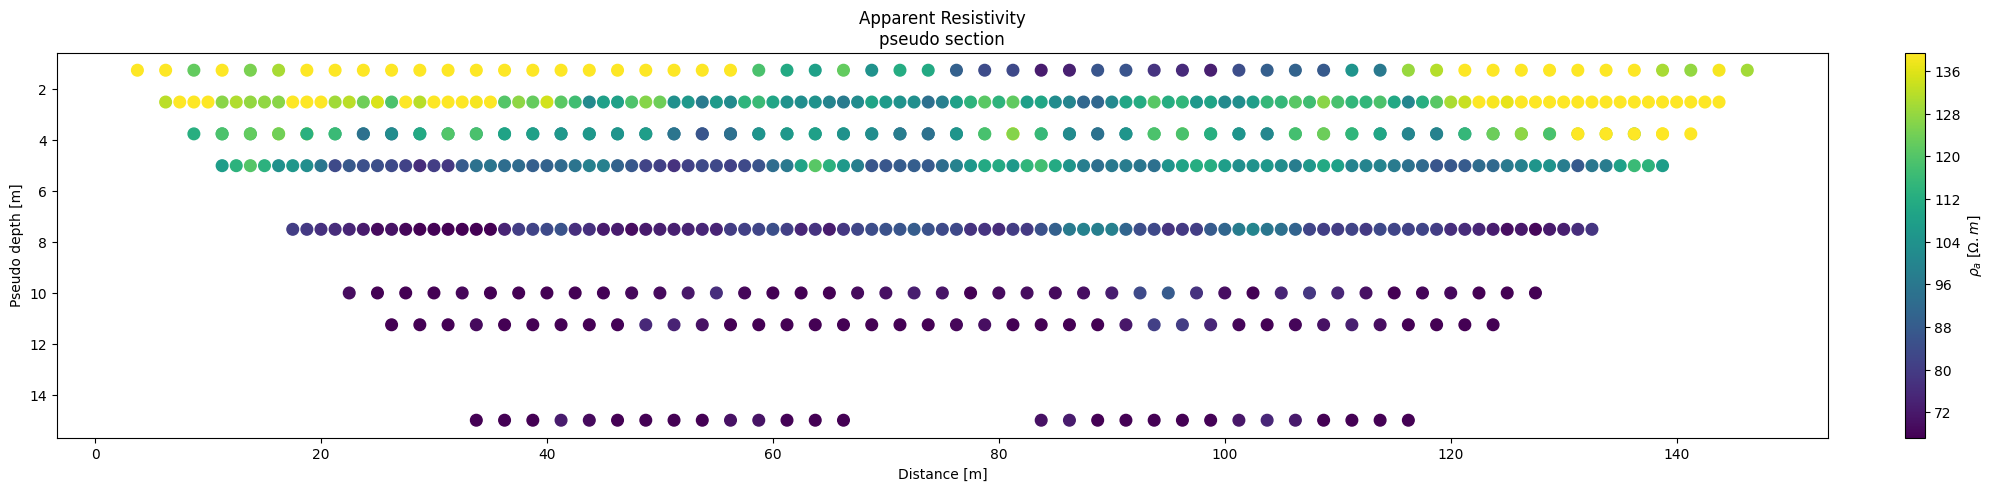

In [5]:
k.showPseudo()

In [6]:
k.elec

,x,y,z,remote,buried,label
0,0.0,0.0,0.0,False,False,1
1,2.5,0.0,0.0,False,False,2
2,5.0,0.0,0.0,False,False,3
3,7.5,0.0,0.0,False,False,4
4,10.0,0.0,0.0,False,False,5
...,...,...,...,...,...,...
56,140.0,0.0,0.0,False,False,57
57,142.5,0.0,0.0,False,False,58
58,145.0,0.0,0.0,False,False,59
59,147.5,0.0,0.0,False,False,60


In [ ]:
import pandas as pd
elevFile = r"/workspaces/GEOL451/ERT/ERTSampleData/IBSPNorth_ElevXYZ_resipy.csv"
topoData = pd.read_csv(elevFile)
topoData

,x,y,z
0,0.000000,0,177.622
1,1.006711,0,177.583
2,2.013423,0,177.568
3,3.020134,0,177.645
4,4.026846,0,177.685
...,...,...,...
145,145.973154,0,177.772
146,146.979866,0,177.699
147,147.986577,0,177.694
148,148.993289,0,177.705


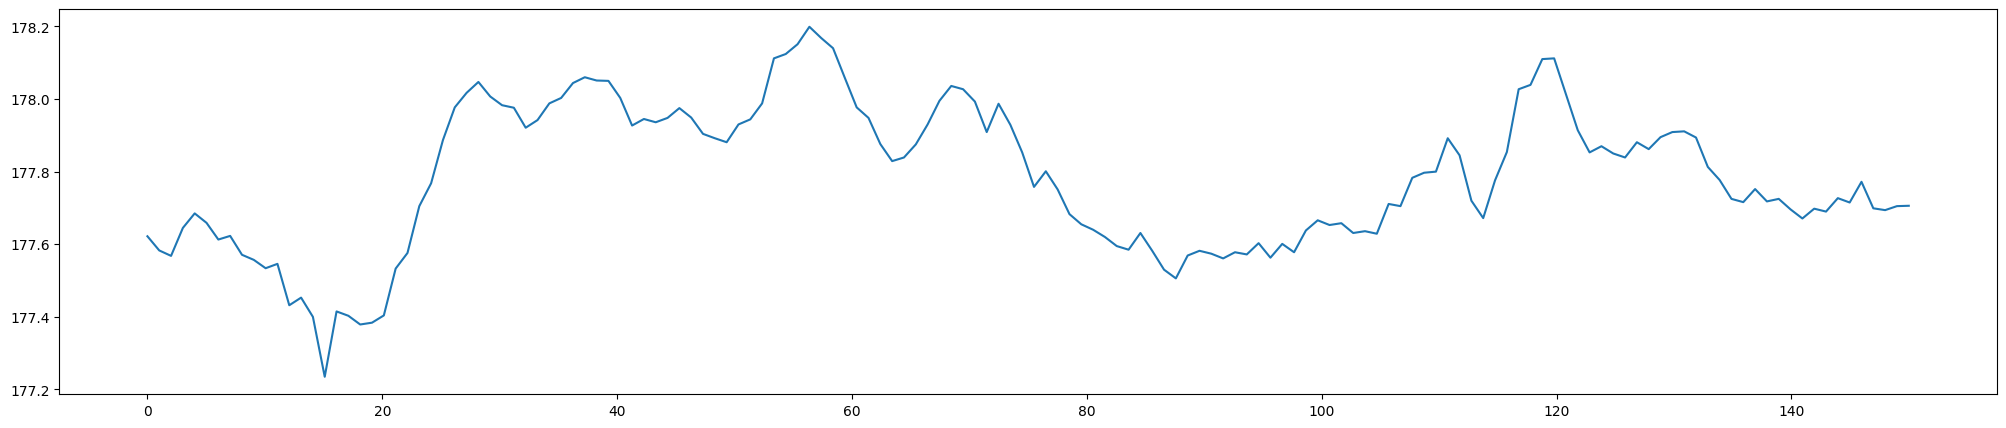

In [8]:
xElecs = np.array(k.elec['x'])
xElevs = np.array(topoData['x'])
zElevs = np.array(topoData['z'])
plt.plot(xElevs, zElevs)

In [10]:
# Interpolate elevation data to electrodes
zElecs = np.interp(x=xElecs, xp=xElevs, fp=zElevs)
yElecs = np.zeros_like(zElecs)

# Create data frame to import into resipy
elecDF = pd.DataFrame()
elecDF['x'] = xElecs
elecDF['y'] = yElecs
elecDF['z'] = zElecs
elecDF.columns = ['x', 'y', 'z']

elecFilepath = r"/workspaces/GEOL451/ERT/ERTSampleData/IBSPNorth_elecs4Resipy.csv" 
elecDF.to_csv(elecFilepath, index=False)
k.importElec(elecFilepath)
k.elec

,label,x,y,z,remote,buried
0,1,0.0,0.0,177.622000,False,False
1,2,2.5,0.0,177.605217,False,False
2,3,5.0,0.0,177.659867,False,False
3,4,7.5,0.0,177.599600,False,False
4,5,10.0,0.0,177.535533,False,False
...,...,...,...,...,...,...
56,57,140.0,0.0,177.694333,False,False
57,58,142.5,0.0,177.693600,False,False
58,59,145.0,0.0,177.716900,False,False
59,60,147.5,0.0,177.696417,False,False


<Axes: >

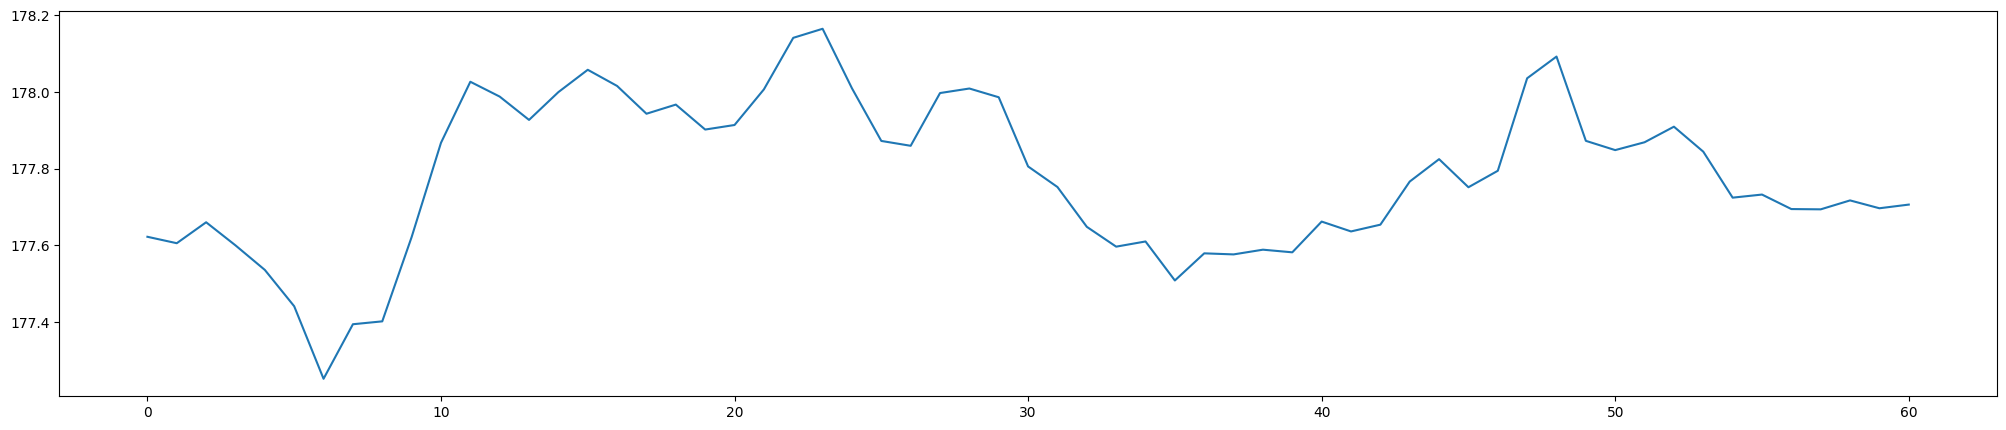

In [8]:
k.elec['z'].plot()

filterData: 0 / 582 quadrupoles removed.
9 measurements outside [0,200] removed!


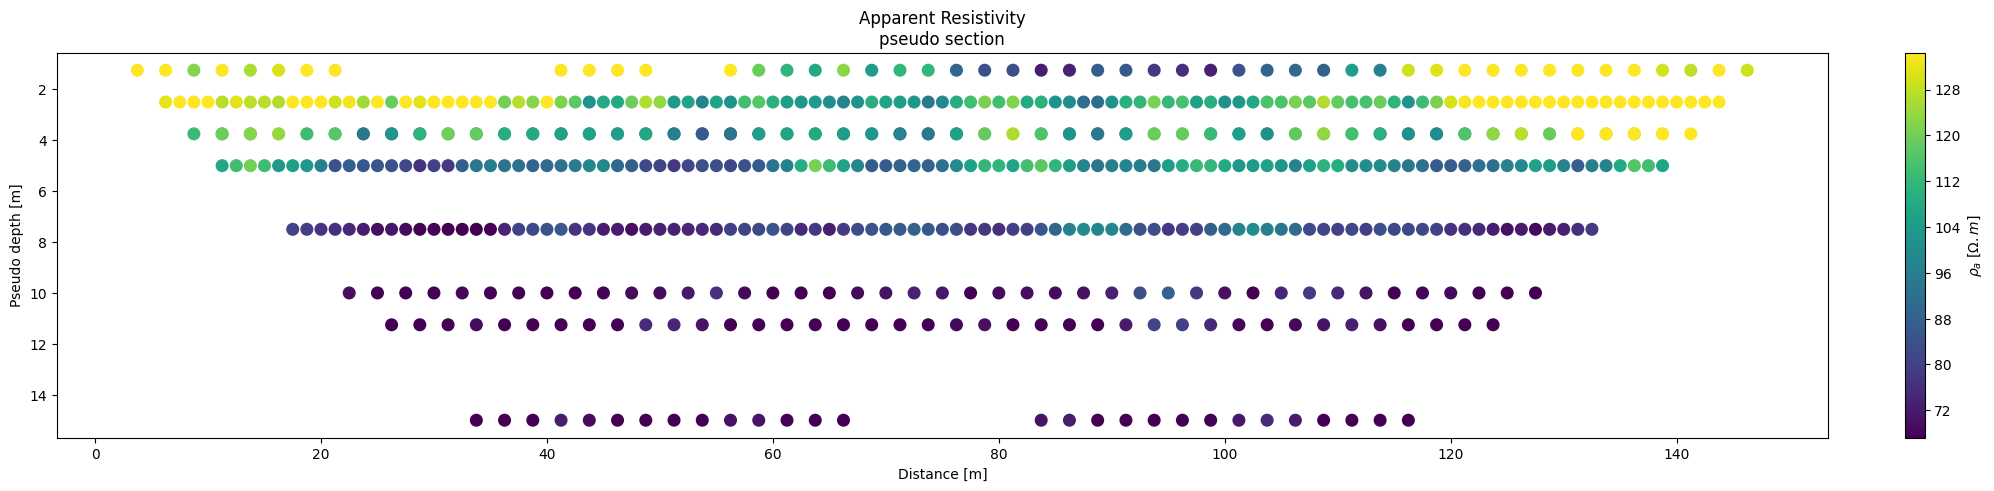

In [9]:
#k.filterElec([30]) #You can remove all data associated with an electrode here
k.filterNegative() #Remove data with negative apparent resistivity
k.filterAppResist(vmin=0, vmax=200) #Remove data with apparent resistivity outside these bounds
k.showPseudo()

Creating triangular mesh...done (7070 elements)


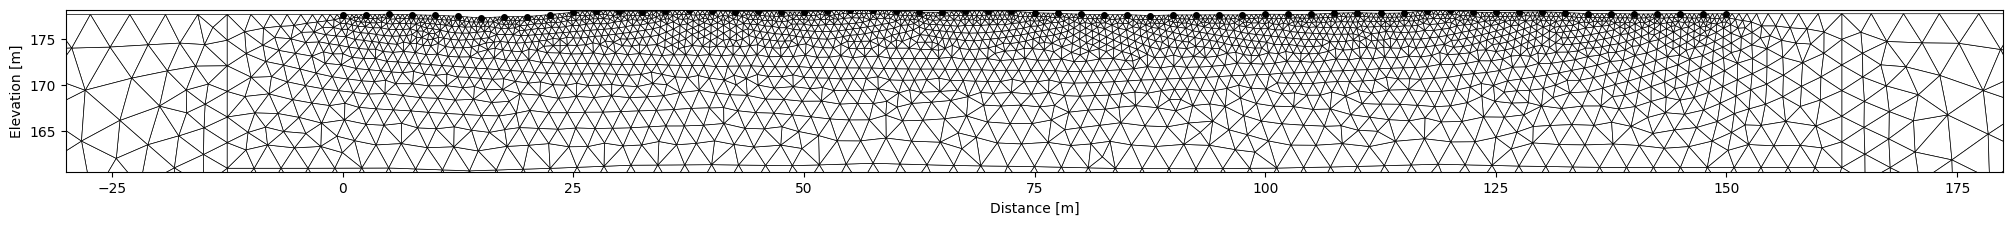

In [10]:
k.createMesh(cl_factor=5, res0=100)
k.showMesh()

In [12]:
invParams = {'data_type':1, 
             'invert_type':1,''
             'max_iterations':8,
             'rho_min':0,
             'rho_max':5000,
             'error_mod':2}

k.err = False
k.invert(param=invParams)

Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 03 - 04 - 2025
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   573     Measurements rejected:     0
   Geometric mean of apparent resistivities:  0.19065E+03

 >> Total Memory required is:          0.036 Gb

   Iteration   1
     Initial RMS

All ok


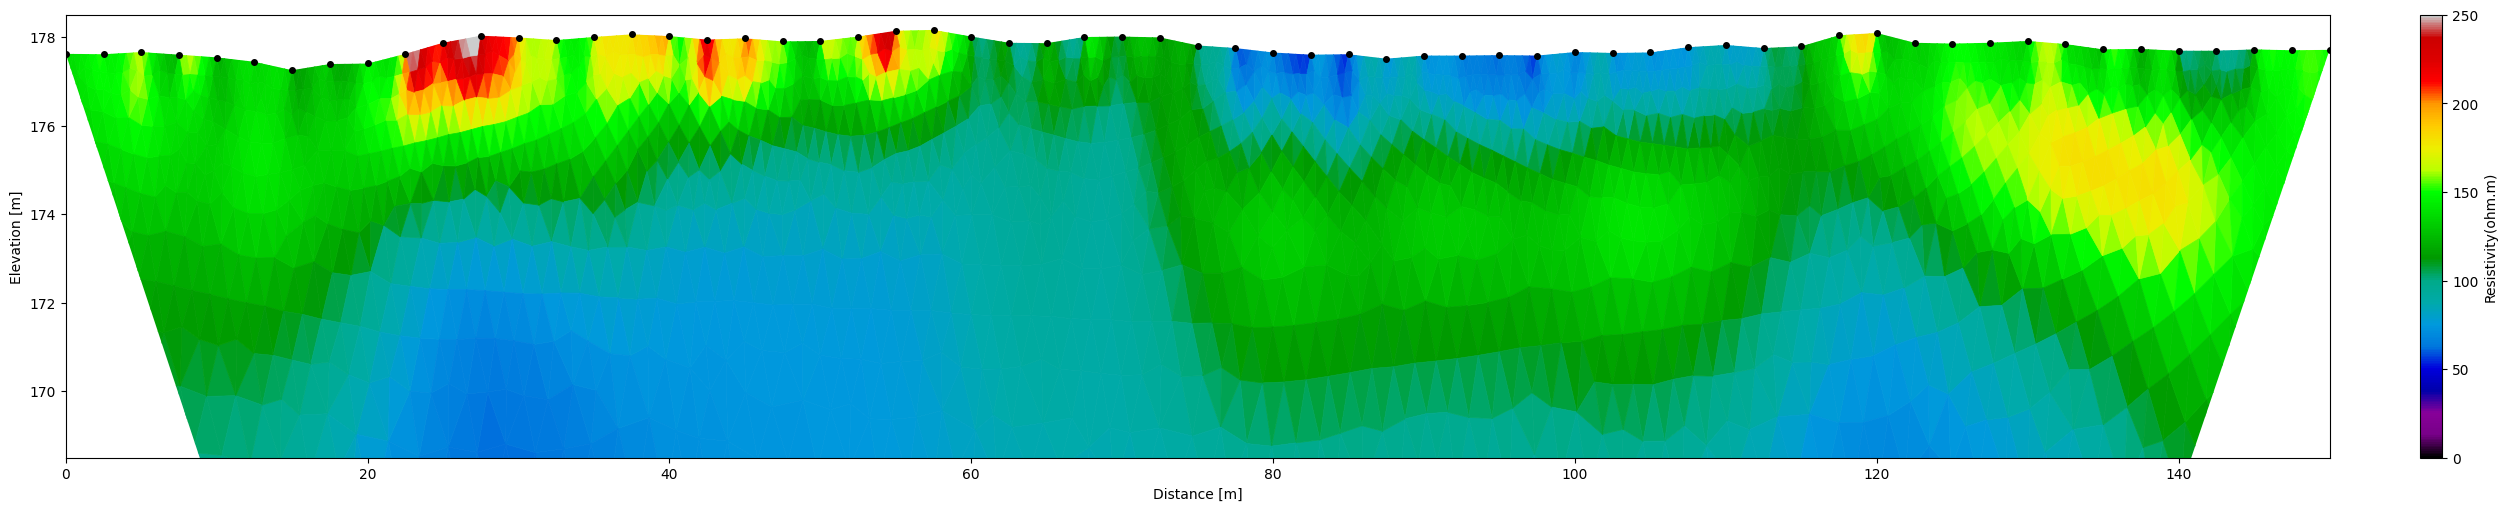

In [13]:
plt.rcParams['figure.figsize'] = (25, 5)
fig, ax = plt.subplots(layout='constrained')
#k.showResults(ax=ax, sens=False, clipCorners=True, clipContour=True, color_map='nipy_spectral', vmin=0, vmax=200) # with contour
k.showResults(ax=ax, attr='Resistivity(ohm.m)', sens=False, clipCorners=True, color_map='nipy_spectral', vmin=0, vmax=250)
ax.set_xlim([0, 150])
ax.set_ylim([168.5, 178.5])
ax.set_aspect('auto')

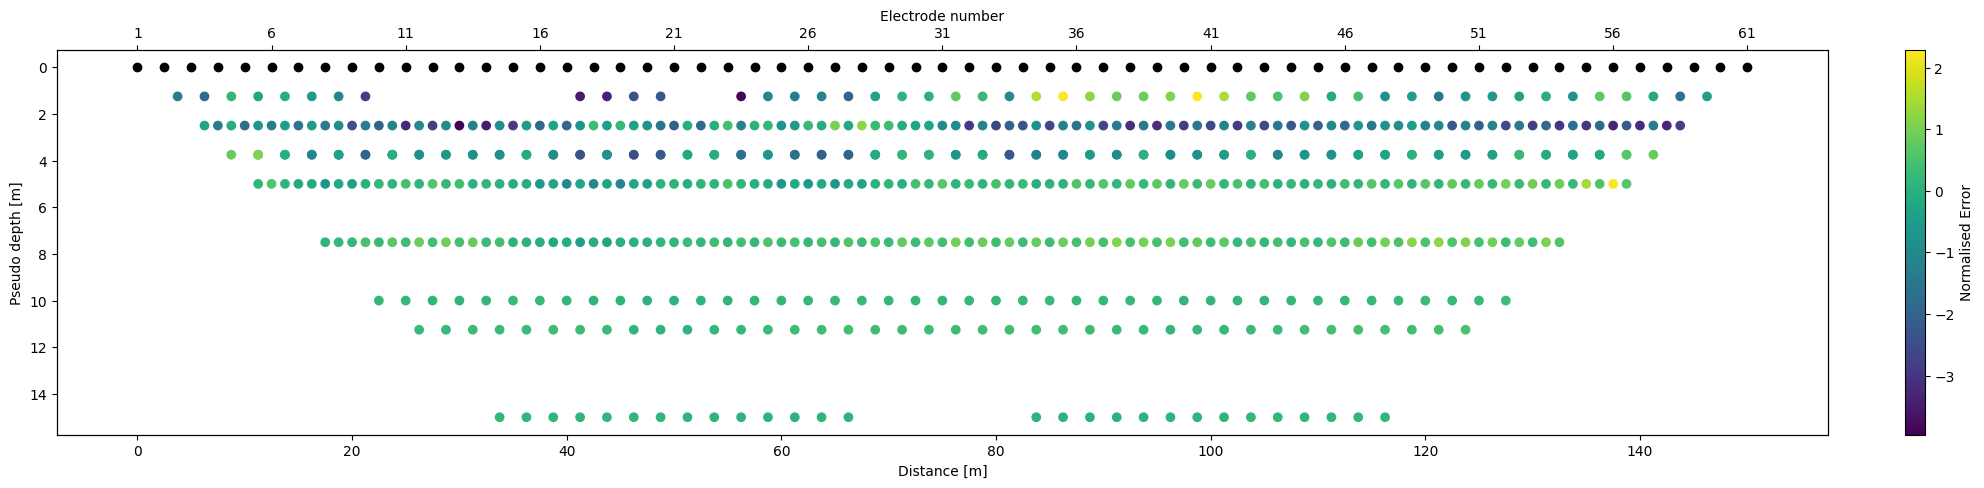

In [14]:
k.showPseudoInvError()

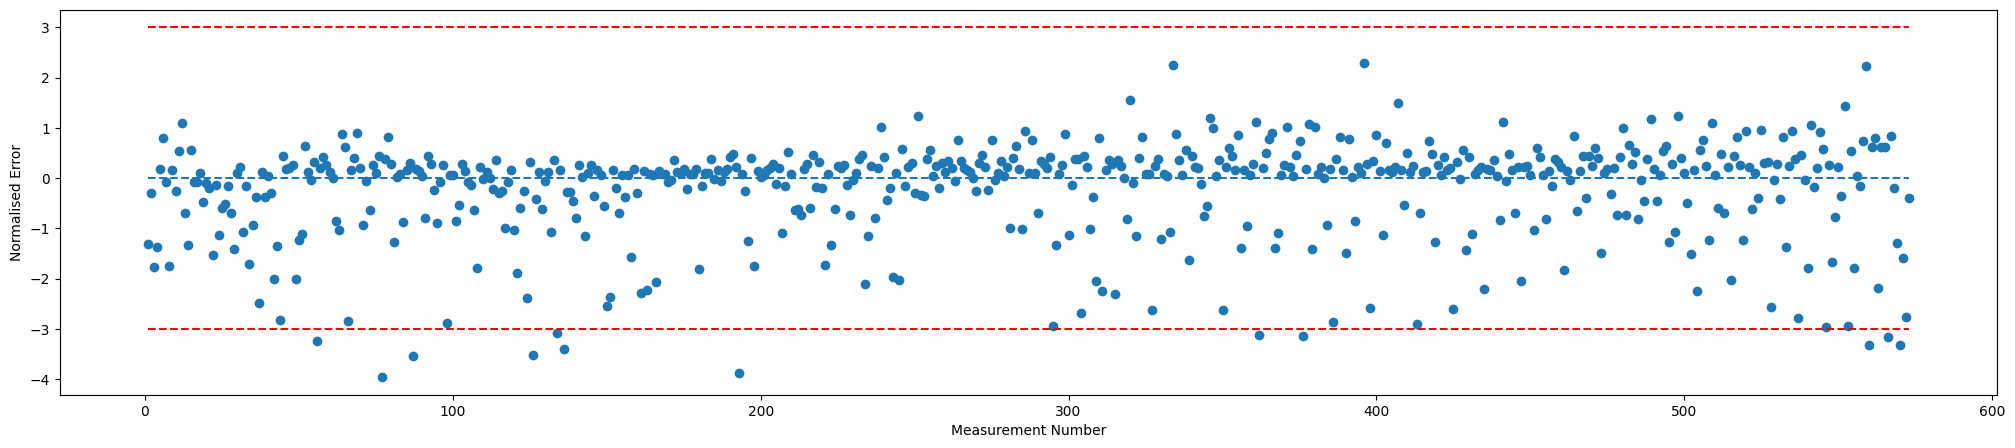

In [15]:
k.showInvError()

In [16]:
k.filterInvError(vmin=-3, vmax=3)

filterData: 12 / 573 quadrupoles removed.


In [17]:
k.invert(param=invParams)

Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 03 - 04 - 2025
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   561     Measurements rejected:     0
   Geometric mean of apparent resistivities:  0.18890E+03

 >> Total Memory required is:          0.035 Gb

   Iteration   1
     Initial RMS

All ok


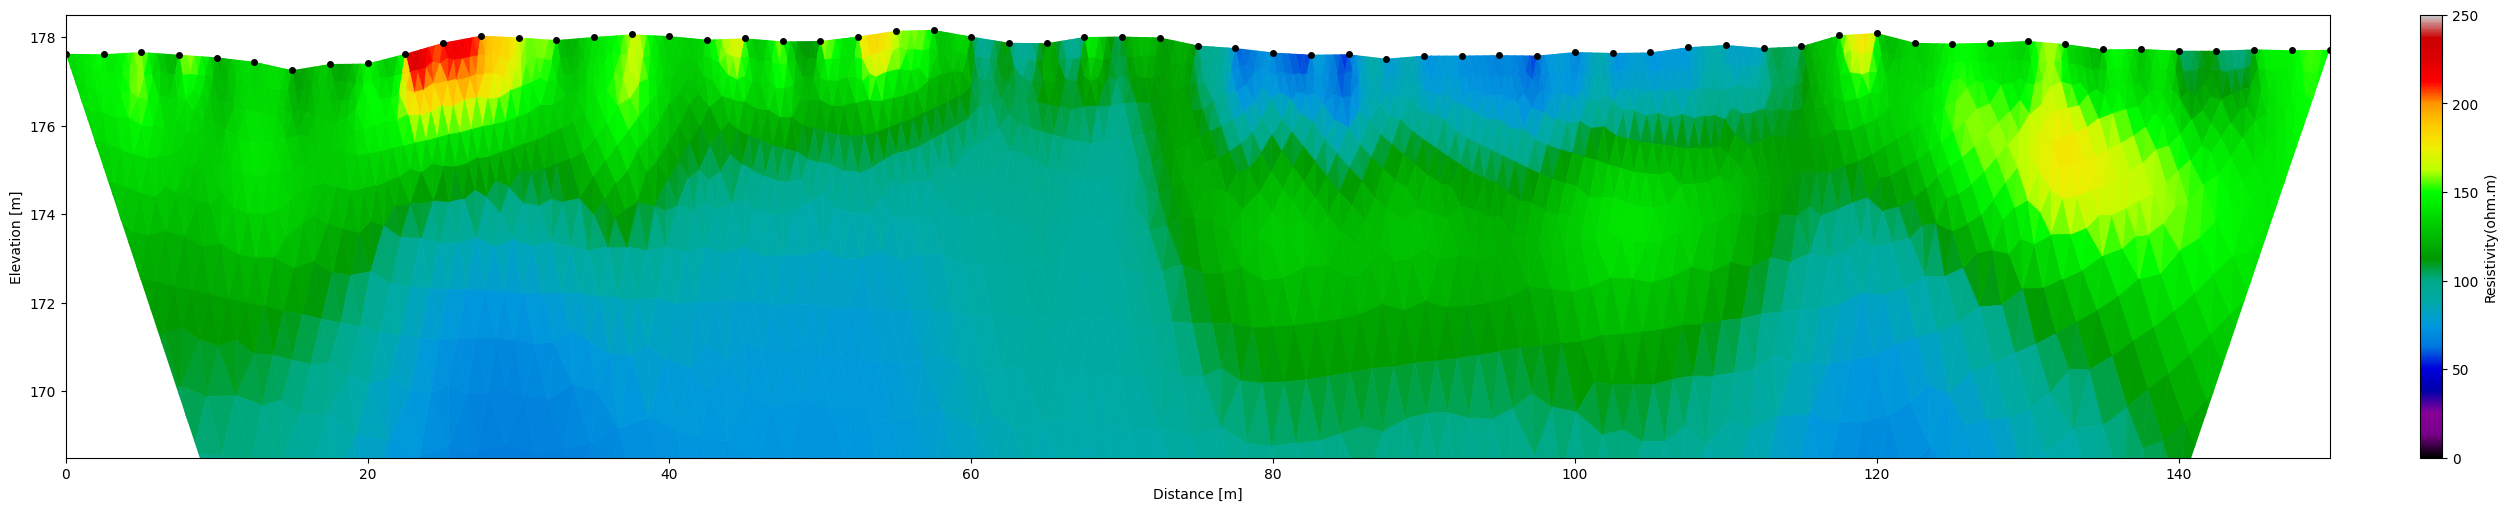

In [18]:
plt.rcParams['figure.figsize'] = (25, 5)
fig, ax = plt.subplots(layout='constrained')
#k.showResults(ax=ax, sens=False, clipCorners=True, clipContour=True, color_map='nipy_spectral', vmin=0, vmax=200) # with contour
k.showResults(ax=ax, attr='Resistivity(ohm.m)', sens=False, clipCorners=True, color_map='nipy_spectral', vmin=0, vmax=250)
ax.set_xlim([0, 150])
ax.set_ylim([168.5, 178.5])
ax.set_aspect('auto')